# Food Desert And Health

## Questions

1. Does the data support the Food Desert Theory, where we expect to see a direct relationship between the % of population’s access to fresh food and their relative health?

2. Are there outliers to this theory? 

3. 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
desert = pd.read_csv("Food Desert_Data_jj.csv")
food_desert = desert.groupby('State').mean()

In [3]:
food_desert.head()

,Grocery 2009,Convenience 2009,Fast Food Restaurants 2009,Adult Diabetes % 2009,Adult Obsesity % 2009,Median Household Income 2009,Limited Access Population% 2009,Limited Access Population 2009,Population 2009,Grocery 2014,...,Population 2014,FF per capita 2009,FF per capita 2014,% change FF Per Capita,Grocery per capita 2009,Grocery per capita 2014,% change in grocery per capita,% change in Access,% Change in Obesity,% change in income
State,,,,,,,,,,,,,,,,,,,,,
AK,9.400000,6.000000,7.300000,7.880000,31.760000,50652.700000,36.800000,4066.000000,9371.700000,8.000000,...,9553.100000,0.001179,0.000469,-18.909000,0.001536,0.001250,-10.104000,13.310000,-3.868000,14.522000
AL,11.590909,46.954545,49.606061,13.906061,35.119697,36158.409091,16.909091,15479.530303,71153.681818,11.303030,...,72071.696970,0.000570,0.000584,1.949394,0.000209,0.000186,-6.459545,29.911364,3.277424,9.576970
AR,10.112676,32.042254,41.661972,12.401408,33.661972,35439.126761,19.056338,13986.169014,57926.732394,9.197183,...,58807.563380,0.000568,0.000562,2.233521,0.000221,0.000181,-12.675493,41.280000,7.626197,10.319155
AZ,64.692308,144.153846,309.615385,9.984615,28.069231,41814.615385,34.307692,92083.769231,486469.846154,62.307692,...,511791.769231,0.000517,0.000512,-1.579231,0.000141,0.000136,-1.438462,7.690769,3.651538,8.396154
CA,75.590909,90.750000,241.022727,8.279545,25.579545,48118.727273,21.340909,51613.681818,362603.431818,79.113636,...,376846.227273,0.000623,0.000629,1.688182,0.000278,0.000281,2.268864,-3.377500,-1.526136,9.622727


In [4]:
!pip install pivottablejs

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from pivottablejs import pivot_ui
pivot_ui(food_desert)

In [7]:
#Set Index
food_desert.reset_index(inplace=True)
food_desert.columns

Index(['State', 'Grocery 2009', 'Convenience 2009',
       'Fast Food Restaurants 2009', 'Adult Diabetes % 2009',
       'Adult Obsesity % 2009', 'Median Household Income 2009',
       'Limited Access Population% 2009', 'Limited Access Population 2009',
       'Population 2009', 'Grocery 2014', 'Convenience 2014',
       'Fast Food Restaurants 2014', 'Adult Diabetes 2014',
       'Adult Obesity 2014', 'Median Household Income 2014',
       'Limited Access % 2014', 'Limited Access 2014', 'Population 2014',
       'FF per capita 2009', 'FF per capita 2014', '% change FF Per Capita',
       'Grocery per capita 2009', 'Grocery per capita 2014',
       '% change in grocery per capita', '% change in Access',
       '% Change in Obesity', '% change in income'],
      dtype='object')

In [23]:
#Full data obesity vs access comparrison
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% change in Access'],
    name='Access'
)
trace2 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% Change in Obesity'],
    name='Obesity'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("accessvshealth.png")
py.iplot(fig, filename='grouped-bar')

In [24]:
#Fast Food and Grocery Change
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% change in grocery per capita'],
    name='Grocery'
)
trace2 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% Change in Obesity'],
    name='Obesity'
)
trace3 = go.Bar(
    x=food_desert['State'],
    y=food_desert['% change FF Per Capita'],
    name='FF'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("accessvshealth.png")
py.iplot(fig, filename='grouped-bar')

In [9]:
#Identify Outliers
outlier_df = food_desert[['State', '% Change in Obesity', '% change in Access']]
outlier_df.head()

,State,% Change in Obesity,% change in Access
0,AK,-3.868000,13.310000
1,AL,3.277424,29.911364
2,AR,7.626197,41.280000
3,AZ,3.651538,7.690769
4,CA,-1.526136,-3.377500


In [10]:
#Sort through data that has opposite signs to find outliers and create new column
outlier_df['Outlier'] = outlier_df.apply((lambda x: (x[2]> 0 and x[1]>0) or (x[2]< 0 and x[1]<0)  ), axis = 1)
outlier_df.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,% Change in Obesity,% change in Access,Outlier
0,AK,-3.868000,13.310000,False
1,AL,3.277424,29.911364,True
2,AR,7.626197,41.280000,True
3,AZ,3.651538,7.690769,True
4,CA,-1.526136,-3.377500,True


In [11]:
#Pull Outliers
outlier_list=outlier_df[outlier_df['Outlier'] == False]
outlier_list

,State,% Change in Obesity,% change in Access,Outlier
0,AK,-3.868000,13.310000,False
6,CT,9.686667,-1.623333,False
7,DE,2.875000,-16.720000,False
17,LA,5.148409,-0.480227,False
18,MA,0.770714,-13.382143,False
20,ME,0.627500,-5.960625,False
22,MN,3.579737,-4.340658,False
27,ND,3.401961,-10.590784,False
28,NE,2.488539,-7.723483,False
29,NH,8.821000,-6.348000,False


In [12]:
#Index Numbers
outlier_list.index

Int64Index([0, 6, 7, 17, 18, 20, 22, 27, 28, 29, 38, 41, 42, 45, 49], dtype='int64')

In [13]:
#Pull outliers data from original DataFrame
outlier_data = food_desert.iloc[[0, 6, 7, 17, 18, 20, 22, 27, 28, 29, 38, 41, 42, 45, 49],:]
outlier_data

,State,Grocery 2009,Convenience 2009,Fast Food Restaurants 2009,Adult Diabetes % 2009,Adult Obsesity % 2009,Median Household Income 2009,Limited Access Population% 2009,Limited Access Population 2009,Population 2009,...,Population 2014,FF per capita 2009,FF per capita 2014,% change FF Per Capita,Grocery per capita 2009,Grocery per capita 2014,% change in grocery per capita,% change in Access,% Change in Obesity,% change in income
0,AK,9.400000,6.000000,7.300000,7.880000,31.760000,50652.700000,36.800000,4066.000000,9371.700000,...,9553.100000,0.001179,0.000469,-18.909000,0.001536,0.001250,-10.104000,13.310000,-3.868000,14.522000
6,CT,84.833333,125.666667,220.333333,7.483333,23.100000,67162.500000,26.833333,116899.833333,406260.833333,...,409714.333333,0.000491,0.000583,20.293333,0.000190,0.000201,4.110000,-1.623333,9.686667,12.111667
7,DE,32.500000,77.500000,112.000000,11.750000,31.050000,50036.000000,18.000000,32606.500000,179727.500000,...,191338.500000,0.000613,0.000590,-2.575000,0.000174,0.000188,15.355000,-16.720000,2.875000,9.960000
17,LA,16.477273,48.750000,58.022727,12.052273,33.740909,39219.681818,23.750000,23823.522727,85195.795455,...,87089.159091,0.000517,0.000544,5.187045,0.000225,0.000195,-10.515682,-0.480227,5.148409,9.418636
18,MA,61.571429,115.785714,203.714286,9.150000,24.621429,56539.428571,23.785714,74951.071429,282394.357143,...,290014.500000,0.000850,0.000895,5.889286,0.000273,0.000281,5.662143,-13.382143,0.770714,12.657143
20,ME,14.312500,43.812500,37.125000,10.850000,31.456250,39512.187500,12.312500,7860.500000,61954.187500,...,61605.875000,0.000510,0.000551,14.260000,0.000221,0.000233,10.615625,-5.960625,0.627500,11.757500
22,MN,12.197368,26.789474,43.828947,9.228947,29.303947,46406.868421,22.881579,17402.947368,68051.460526,...,70402.157895,0.000527,0.000532,5.499868,0.000254,0.000234,-3.900789,-4.340658,3.579737,14.340132
27,ND,7.470588,15.431373,25.235294,9.552941,30.335294,46723.019608,38.372549,10707.490196,41387.117647,...,43398.254902,0.000492,0.000505,6.925098,0.000382,0.000361,-3.890588,-10.590784,3.401961,20.549412
28,NE,7.741573,23.089888,33.292135,9.967416,30.280899,43387.056180,35.112360,11904.483146,47662.741573,...,49356.033708,0.000533,0.000534,0.334382,0.000364,0.000353,-0.849326,-7.723483,2.488539,14.676180
29,NH,45.800000,102.900000,143.400000,8.980000,27.320000,50069.300000,18.300000,52729.600000,210233.600000,...,219914.400000,0.000683,0.000704,5.018000,0.000235,0.000197,-13.720000,-6.348000,8.821000,13.696000


In [16]:
# Create list omitting outliers
standard =food_desert.drop(food_desert.index[[0, 6, 7, 17, 18, 20, 22, 27, 28, 29, 38, 41, 42, 45, 49]])
standard.head()

,State,Grocery 2009,Convenience 2009,Fast Food Restaurants 2009,Adult Diabetes % 2009,Adult Obsesity % 2009,Median Household Income 2009,Limited Access Population% 2009,Limited Access Population 2009,Population 2009,...,Population 2014,FF per capita 2009,FF per capita 2014,% change FF Per Capita,Grocery per capita 2009,Grocery per capita 2014,% change in grocery per capita,% change in Access,% Change in Obesity,% change in income
1,AL,11.590909,46.954545,49.606061,13.906061,35.119697,36158.409091,16.909091,15479.530303,71153.681818,...,72071.696970,0.000570,0.000584,1.949394,0.000209,0.000186,-6.459545,29.911364,3.277424,9.576970
2,AR,10.112676,32.042254,41.661972,12.401408,33.661972,35439.126761,19.056338,13986.169014,57926.732394,...,58807.563380,0.000568,0.000562,2.233521,0.000221,0.000181,-12.675493,41.280000,7.626197,10.319155
3,AZ,64.692308,144.153846,309.615385,9.984615,28.069231,41814.615385,34.307692,92083.769231,486469.846154,...,511791.769231,0.000517,0.000512,-1.579231,0.000141,0.000136,-1.438462,7.690769,3.651538,8.396154
4,CA,75.590909,90.750000,241.022727,8.279545,25.579545,48118.727273,21.340909,51613.681818,362603.431818,...,376846.227273,0.000623,0.000629,1.688182,0.000278,0.000281,2.268864,-3.377500,-1.526136,9.622727
5,CO,13.857143,33.553571,63.928571,6.876786,21.951786,47755.446429,28.482143,18153.000000,87508.214286,...,92247.821429,0.000596,0.000587,1.272321,0.000334,0.000356,5.220357,0.107857,2.454821,10.479286


In [17]:
#Limited Access Decreases and Obesity rises
#13 cases where obesity increased while limited access decreased and two cases where limited access increased and obesity decreased

import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=outlier_data['State'],
    y=outlier_data['% change in Access'],
    name='Access'
)
trace2 = go.Bar(
    x=outlier_data['State'],
    y=outlier_data['% Change in Obesity'],
    name='Obesity'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("outliergroupbar.png")
py.iplot(fig, filename='grouped-bar')

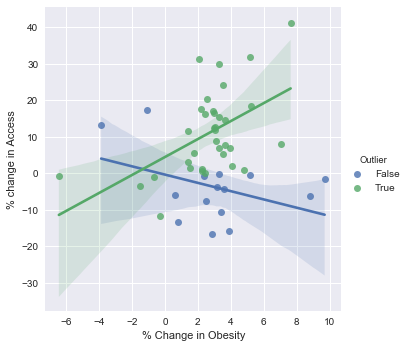

In [18]:
sns.set()


# Plot tip as a function of toal bill across days
g = sns.lmplot(x="% Change in Obesity", y="% change in Access", hue="Outlier",
               truncate=True, size=5, data=outlier_df)
plt.savefig("outvsstand.png")
plt.show()

In [26]:
#Outlier Layered Data
x = outlier_data['State']

trace1 = {
  'x': x,
  'y': outlier_data['% change in grocery per capita'],
  'name': 'Grocery',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': outlier_data['% change in Access'],
  'name': 'Access',
  'type': 'bar'
};
trace3 = {
  'x': x,
  'y': outlier_data['% change FF Per Capita'],
  'name': 'FF',
  'type': 'bar'
 }
 
trace4 = {
  'x': x,
  'y': outlier_data['% change in income'],
  'name': 'Income',
  'type': 'bar'
 }

trace5 = {
  'x': x,
  'y': outlier_data['% Change in Obesity'],
  'name': 'Obesity',
  'type': 'bar'
 }
 
data = [trace2, trace4, trace5];
layout = {
  'xaxis': {'title': 'X axis'},
  'yaxis': {'title': 'Y axis'},
  'barmode': 'relative',
  'title': 'Access, Obesity, Income'
};
py.iplot({'data': data, 'layout': layout}, filename='barmode-relative')
plt.savefig("outlierbarmode.png")

In [20]:
#Create Map for Outliers
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in outlier_list.columns:
    outlier_list[col] = outlier_list[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = outlier_list['State'],
        z = outlier_list["% Change in Obesity"].astype(float),
        locationmode = 'USA-states',
       # text = texas_desert['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Obesity Percent Change")
        ) ]

layout = dict(
        title = 'Outliers Obesity Percent Change',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plt.savefig("outliersmap.png")
py.iplot( fig, filename='d3-cloropleth-map' )

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
#Full data obesity vs income comparrison
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Bar(
    x=['Outlier'],
    y=outlier_data['% change in income'].mean(),
    name='Outlier'
)
trace2 = go.Bar(
    x=['Standard'],
    y=standard['% change in income'].mean(),
    name='Standard'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
plt.savefig("MedianIncome.png")
py.iplot(fig, filename='grouped-bar')